In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Tejes\Downloads\student-data.csv")
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,yes


#  Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
data.shape

(395, 31)

In [7]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [9]:
# Calculate no. of students
num_students = len(data.index)

# Calculate passing students
num_passed = len(data[data['passed']=='yes'])

# Calculate number of features
num_features = len(data.columns)

# Calculate no. of failed
num_failed = num_students-num_passed

# Calculate no. of graduation rate
grad_rate = (num_passed/num_students)*100
print('Total Students: ',num_students)
print('No. of Features: ',num_features)
print('No. of Passed Students: ',num_passed)
print('No. of Students did not Graduate: ',num_failed)
print('Graduation Percentage: ',grad_rate)
      

Total Students:  395
No. of Features:  31
No. of Passed Students:  265
No. of Students did not Graduate:  130
Graduation Percentage:  67.08860759493672


# Data Preprocessing 

In [30]:
X=data.drop('passed',axis=1) #------------ feaatures(independent variable)
y=data['passed'] # ----------------------- target(dependent variable)
print('Features Selected',X)
print('Target Feature',y)

Features Selected     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... higher internet  romanti

In [31]:
for i in X[['higher','internet','romantic']]:
    X=X.replace(['yes', 'no'], [1, 0])
print(X.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime  goout  Dalc  Walc  health  \
0      1        0         0       4         3      4     1     1       3   
1      1        1         0       5         3      3     1     1       3   
2      1        1         0       4         3      2     2     3       3   
3      1        1         1       3         2      2     1     1       5   
4      1        0         0       4         3      2     1     2       5   

   absences  
0         6  
1         4  
2        10  


In [32]:
X = pd.get_dummies(X,columns=['school','sex','address','reason','guardian','famsize','Pstatus', 'Mjob','Fjob'])
print(X.head())
print(X.dtypes)



   age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  paid  \
0   18     4     4           2          2         0          1       0     0   
1   17     1     1           1          2         0          0       1     0   
2   15     1     1           1          2         3          1       0     1   
3   15     4     2           1          3         0          0       1     1   
4   16     3     3           1          2         0          0       1     1   

   activities  ...  Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  \
0           0  ...             1            0           0              0   
1           0  ...             1            0           0              0   
2           0  ...             1            0           0              0   
3           1  ...             0            1           0              0   
4           0  ...             0            0           1              0   

   Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  Fjob_s

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [34]:
X_train.shape

(316, 48)

# Applying KNN Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [36]:
acc_values

[0.6329113924050633,
 0.6075949367088608,
 0.6835443037974683,
 0.620253164556962,
 0.6582278481012658,
 0.6075949367088608,
 0.6582278481012658,
 0.6455696202531646,
 0.6455696202531646,
 0.6075949367088608,
 0.6708860759493671,
 0.6962025316455697]

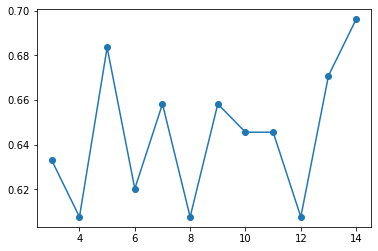

In [37]:
plt.plot(neighbors,acc_values,'o-')
plt.show()

In [38]:
# K value is: 14

In [40]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=14,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [42]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,pos_label='yes'))
print('Recall is',recall_score(y_test,y_pred,pos_label='yes'))
print('F1 score is',f1_score(y_test,y_pred,pos_label='yes'))

Accuracy is 0.6962025316455697
Precision is 0.7
Recall is 0.9423076923076923
F1 score is 0.8032786885245902


In [43]:
confusion_matrix(y_test,y_pred)

array([[ 6, 21],
       [ 3, 49]], dtype=int64)

In [44]:
# There are 24 mismathches

# Standard Scalling

In [45]:
X.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,...,0.149367,0.086076,0.356962,0.260759,0.146835,0.050633,0.045570,0.549367,0.281013,0.073418
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,...,0.356902,0.280832,0.479711,0.439606,0.354391,0.219525,0.208814,0.498188,0.450064,0.261152
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

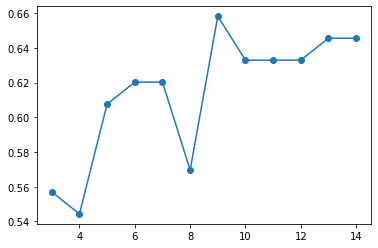

In [47]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
plt.plot(neighbors,acc_values,'o-')
plt.show()

In [48]:
# K value is: 9

In [49]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [50]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,pos_label='yes'))
print('Recall is',recall_score(y_test,y_pred,pos_label='yes'))
print('F1 score is',f1_score(y_test,y_pred,pos_label='yes'))

Accuracy is 0.6582278481012658
Precision is 0.6811594202898551
Recall is 0.9038461538461539
F1 score is 0.7768595041322315


In [51]:
confusion_matrix(y_test,y_pred)

array([[ 5, 22],
       [ 5, 47]], dtype=int64)

In [52]:
# Since standard scalling is decreasing the accuracy, no need for standard scalling

# Applying Decision Tree

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt_model=DecisionTreeClassifier()

In [57]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred=dt_model.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.6708860759493671


In [62]:
confusion_matrix(y_test,y_pred)

array([[11, 16],
       [10, 42]], dtype=int64)

In [63]:
# Misclasification is: 27

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [66]:
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6455696202531646


array([[12, 15],
       [13, 39]], dtype=int64)

In [68]:
# Misclasification is: 28, no need for standard scalling

# Applying SVM Model

In [69]:
from sklearn.svm import SVC

In [70]:
svm_linear=SVC(kernel='linear')

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [73]:
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [74]:
y_pred=svm_linear.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.6962025316455697


In [75]:
confusion_matrix(y_test,y_pred)

array([[10, 17],
       [ 7, 45]], dtype=int64)

In [76]:
Misclasification: 24

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6835443037974683


array([[11, 16],
       [ 9, 43]], dtype=int64)

In [78]:
Misclasification: 25

# Polynomial 

In [79]:
svm_poly=SVC(kernel='poly',degree=3)

In [80]:
svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [82]:
y_pred=svm_poly.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6455696202531646


array([[ 3, 24],
       [ 4, 48]], dtype=int64)

# Radial SVM

In [83]:
svm_radial=SVC(kernel='rbf')

In [84]:
svm_radial.fit(X_train,y_train)

SVC()

In [85]:
y_pred=svm_radial.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6455696202531646


array([[ 2, 25],
       [ 3, 49]], dtype=int64)

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf_model = RandomForestClassifier(random_state=42)

In [88]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [89]:
y_pred=rf_model.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6835443037974683


array([[ 5, 22],
       [ 3, 49]], dtype=int64)

In [91]:
#Applying KNN model would be the best choice as it gives the most accuracy close to 70%